In [ ]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download("wordnet")

import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

NameError: name 'nltk' is not defined

In [ ]:
# This will install an updated version of numpy and scipy
# This is for the wordclouds

%pip install nltk
%pip install gensim
%pip install wordcloud

import nltk
from nltk import word_tokenize
from nltk.corpus import SentimentIntensityAnalyser
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import coherencemodel
from wordcloud import WordCloud

from PIL import Image
import random


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
#Trying a loop to account for pagination:

modules = []
for x in range (0,4):
  base_url = f"https://uoncourses.org/?school=Electrical+and+Electronic+Engineering&level=&semester=&title=&page={x}"
  html = urlopen(base_url)

  soup = BeautifulSoup(html, 'lxml')
  type(soup)

  notts_EEE = soup.find_all('a', href=re.compile("module"))
  EEE_urls = [a['href'] for a in notts_EEE]

  modules.extend(EEE_urls)

for x in range (0,4):
  base_url = f"https://uoncourses.org/?school=Chemical+and+Environmental+Engineering&level=&semester=&title=&page={x}"
  html = urlopen(base_url)

  soup = BeautifulSoup(html, 'lxml')
  type(soup)

  notts_CEE = soup.find_all('a', href=re.compile("module"))
  CEE_urls = [a['href'] for a in notts_CEE]

  modules.extend(CEE_urls)

for x in range (0,4):
  base_url = f"https://uoncourses.org/?school=Civil+Engineering&level=&semester=&title=&page={x}"
  html = urlopen(base_url)

  soup = BeautifulSoup(html, 'lxml')
  type(soup)

  notts_CE = soup.find_all('a', href=re.compile("module"))
  CE_urls = [a['href'] for a in notts_CE]

  modules.extend(CE_urls)

for x in range (0,7):
  base_url = f"https://uoncourses.org/?school=Mechanical%2C+Materials+%26+Manufacturing+Engineering&level=&semester=&title=&page={x}"
  html = urlopen(base_url)

  soup = BeautifulSoup(html, 'lxml')
  type(soup)

  notts_M3E = soup.find_all('a', href=re.compile("module"))
  M3E_urls = [a['href'] for a in notts_M3E]

  modules.extend(M3E_urls)

In [ ]:
modules_unique = dict.fromkeys(modules)
len(modules_unique)


260

In [ ]:
base_url1 = "https://uoncourses.org"

links_unique = []
for i in modules_unique:
  links_unique.append(base_url1 + i)

len(links_unique)

260

In [ ]:
#Bypassing Error 403:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/122.0.0.0 Safari/537.36"
}

notts_rawdata = []
for i, url in enumerate(links_unique, start = 1):
    try:
        print(f"\n--- Scraping URL {i}: {url} ---")
        response = requests.get(url, headers = headers)
        page_soup = BeautifulSoup(response.content, "html.parser")
        header = page_soup.find("h2", string="Learning Outcomes")

#ChatGPT helped with the "skillstext" part!

        skillstext = []
        if header:
          for sibling in header.find_next_siblings():
            if sibling.name == "h2":
              break

            skillstext.append(sibling.get_text(strip = False))

        notts_rawdata.extend(skillstext)

    except Exception as e:
        print (f"Failed to scrape {url}: {e}")


--- Scraping URL 1: https://uoncourses.org/module/EEEE4114 ---

--- Scraping URL 2: https://uoncourses.org/module/EEEE4115 ---

--- Scraping URL 3: https://uoncourses.org/module/EEEE4116 ---

--- Scraping URL 4: https://uoncourses.org/module/EEEE4117 ---

--- Scraping URL 5: https://uoncourses.org/module/EEEE3090 ---

--- Scraping URL 6: https://uoncourses.org/module/EEEE4118 ---

--- Scraping URL 7: https://uoncourses.org/module/EEEE2077 ---

--- Scraping URL 8: https://uoncourses.org/module/EEEE3096 ---

--- Scraping URL 9: https://uoncourses.org/module/EEEE3129 ---

--- Scraping URL 10: https://uoncourses.org/module/EEEE1002 ---

--- Scraping URL 11: https://uoncourses.org/module/EEEE4119 ---

--- Scraping URL 12: https://uoncourses.org/module/EEEE1041 ---

--- Scraping URL 13: https://uoncourses.org/module/EEEE2064 ---

--- Scraping URL 14: https://uoncourses.org/module/EEEE3127 ---

--- Scraping URL 15: https://uoncourses.org/module/EEEE2063 ---

--- Scraping URL 16: https://uonc

In [ ]:
trial = "https://uoncourses.org/module/MMME3079"
response = requests.get(trial, headers = headers)
page_soup = BeautifulSoup(response.content, "html.parser")
header = page_soup.find("h2", string="Learning Outcomes")

skillstext = []
if header:
  for sibling in header.find_next_siblings():
    if sibling.name == "h2":
      break
    skillstext.append(sibling.get_text(strip = False))

skillstext

['On successful completion of this module, students will be able to:',
 'LO1 - Identify and evaluate the Space environment effects in a space system.',
 'LO2 - Evaluate and identify the Technology Readiness Level of a space technology.',
 'LO3 - Demonstrate understanding and perform calculations relating to basic orbital mechanics.',
 'LO4 - \xa0Demonstrate understanding and perform calculations relating to basic satellite elements (power budget, link budget, mass budget, etc.)',
 'LO5 - Demonstrate ability to communicate familiarity with and understanding of the lectured materials',
 'LO6 - Communicate the outcome of an aerospace project in an appropriate and professional written report']

In [ ]:
with open("notts_modules.txt", "w") as f:
  f.write(str(notts_rawdata))

In [ ]:
notts_textfile = open("notts_modules.txt", "r", encoding = "utf-8")
nottstext = notts_textfile.read()
print(nottstext)

['By the end of the module, students should be able to:LO1 Summarise the physical principles of AC electrical machines topologies\xa0', 'LO2 Compare the operational principles of AC electrical machines topologies\xa0', 'LO3 Explain the principles of field orientation of AC machines drives\xa0', 'LO4 Understand the operational principles of power electronic converters used for high performance vector drives\xa0', 'LO5 Design vector controllers for practical AC machine drives\xa0', 'LO6 Evaluate AC drive performance characteristics\xa0', 'LO7 Develop a vector control drive including relevant algorithms\xa0', 'LO8 Evaluate the performance of the designed system using a CAE/D tool\xa0', 'This module contributes to the delivery of the following Engineering Council outcomes:C1, M1, C2, M2, C3, M3, C5, C6, M6, C7, C9, M9, C13 and M13\xa0', 'By the end of the module, students should be able to:LO1 Demonstrate a critical appreciation of the relative advantages of different parallel software par

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
wordcloud_text = nottstext.lower()
wordcloud_text=re.sub("[^a-zA-Z0-9]", " ", wordcloud_text)

In [ ]:
nottstext.lower()

'[\'by the end of the module, students should be able to:lo1 summarise the physical principles of ac electrical machines topologies\\xa0\', \'lo2 compare the operational principles of ac electrical machines topologies\\xa0\', \'lo3 explain the principles of field orientation of ac machines drives\\xa0\', \'lo4 understand the operational principles of power electronic converters used for high performance vector drives\\xa0\', \'lo5 design vector controllers for practical ac machine drives\\xa0\', \'lo6 evaluate ac drive performance characteristics\\xa0\', \'lo7 develop a vector control drive including relevant algorithms\\xa0\', \'lo8 evaluate the performance of the designed system using a cae/d tool\\xa0\', \'this module contributes to the delivery of the following engineering council outcomes:c1, m1, c2, m2, c3, m3, c5, c6, m6, c7, c9, m9, c13 and m13\\xa0\', \'by the end of the module, students should be able to:lo1 demonstrate a critical appreciation of the relative advantages of di

In [ ]:
tokens = word_tokenize(wordcloud_text, language = "english")
tokens = (word for word in tokens if word not in stopwords.words("english"))
tokens = (word for word in tokens if len(word) >= 3)

In [ ]:
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov|edu|me)"
digits = "([0-9])"

text = " " + nottstext + "  "
text = text.replace("\n"," ")
text = re.sub(prefixes,"\\1<prd>",text)
text = re.sub(websites,"<prd>\\1",text)
text = re.sub(digits + "[.]" + digits,"\\1<prd>\\2",text)
if "..." in text: text = text.replace("...","<prd><prd><prd>")
if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)

if "”" in text: text = text.replace(".”","”.")
if "\"" in text: text = text.replace(".\"","\".")
if "!" in text: text = text.replace("!\"","\"!")
if "?" in text: text = text.replace("?\"","\"?")
text = text.replace(".",".<stop>")
text = text.replace("?","?<stop>")
text = text.replace("!","!<stop>")
text = text.replace("<prd>",".")
words = text.split("<stop>")
words = [s.strip() for s in words]
words1 = pd.DataFrame(words)
words1.columns = ['word']

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2614455557.py:4: SyntaxWarning: invalid escape sequence '\s'
  starters = "(Mr|Mrs|Ms|Dr|Prof|Capt|Cpt|Lt|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
/tmp/ipython-input-2614455557.py:16: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)


In [ ]:
print(len(words1))
print(words1.head(10))

2216
                                                word
0  ['By the end of the module, students should be...
1  ', 'LO2 Apply advanced techniques in mathemati...
2  ', 'LO3 Use suitable techniques for representi...
3  ', 'LO4 Select suitable schemes for modelling ...
4  ', 'This module contributes to the delivery of...
5  ', 'LO2 Assess the frequency responses of MOSF...
6  ', 'LO3 Develop transistor circuits such as Di...
7  ', 'LO4 Design and evaluate a BJT amplifier ta...
8  The design will require the ability to use a c...
9    ', 'LO5 Understand origins and effect of noise.


In [ ]:
from wordcloud import WordCloud


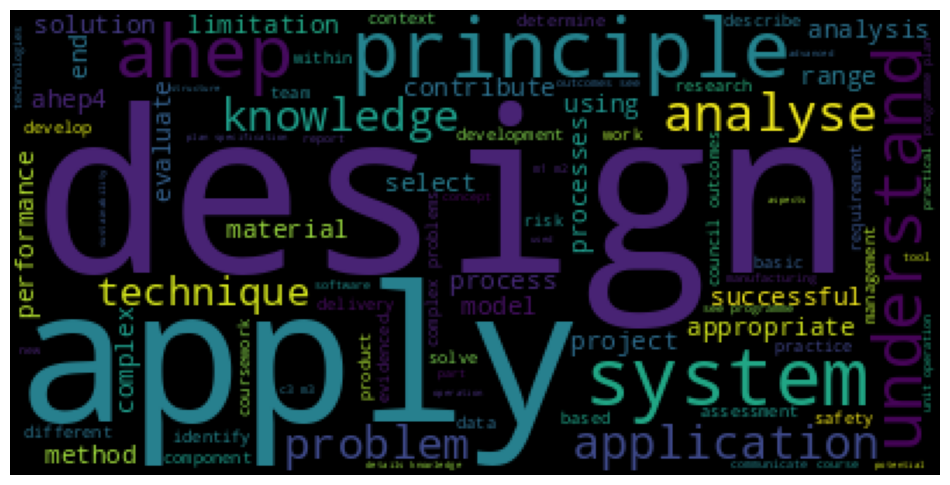

In [ ]:
stopwords_wc = set(stopwords.words("english"))
stopwords_wc.update(["chemical","xa0", "a2", "a1", "a2", "a3", "a4", "key", "transferable", "information", "x80", "module", "students", "learning", "outcome", "skills", "engineering", "including", "relevant", "use", "able", "completion", "broadly", "defined", "academic", "demonstrated", "following", "ability", "working", "library resources", "sources", "study"])
stopwords_wc.update(["lo1", "lo2", "lo3", "lo4", "lo5", "lo6", "lo7", "assessed", "demonstrate"])
wordcloud = WordCloud(max_words = 100, stopwords = stopwords_wc, random_state = 1).generate(wordcloud_text)
plt.figure(figsize = (12,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'xa0': 814, 'engineering': 500, 'design': 455, 'able': 344, 'apply': 331, 'principles': 289, 'module': 261, 'understanding': 248, 'students': 224, 'knowledge': 221, ...})

In [ ]:
fdist.most_common(100)

[('xa0', 814),
 ('engineering', 500),
 ('design', 455),
 ('able', 344),
 ('apply', 331),
 ('principles', 289),
 ('module', 261),
 ('understanding', 248),
 ('students', 224),
 ('knowledge', 221),
 ('ahep', 211),
 ('chemical', 196),
 ('understand', 185),
 ('problems', 182),
 ('appropriate', 177),
 ('systems', 176),
 ('skills', 166),
 ('process', 163),
 ('techniques', 162),
 ('complex', 159),
 ('demonstrate', 156),
 ('ability', 156),
 ('lo2', 150),
 ('lo3', 150),
 ('lo1', 147),
 ('completion', 145),
 ('analyse', 143),
 ('project', 143),
 ('use', 141),
 ('lo4', 130),
 ('evaluate', 129),
 ('analysis', 128),
 ('outcomes', 118),
 ('using', 116),
 ('system', 114),
 ('successful', 113),
 ('including', 112),
 ('methods', 112),
 ('application', 111),
 ('research', 111),
 ('select', 109),
 ('ahep4', 107),
 ('lo5', 104),
 ('range', 101),
 ('processes', 99),
 ('following', 98),
 ('performance', 97),
 ('technical', 91),
 ('programme', 91),
 ('data', 90),
 ('work', 88),
 ('information', 85),
 ('assess

<function matplotlib.pyplot.show(close=None, block=None)>

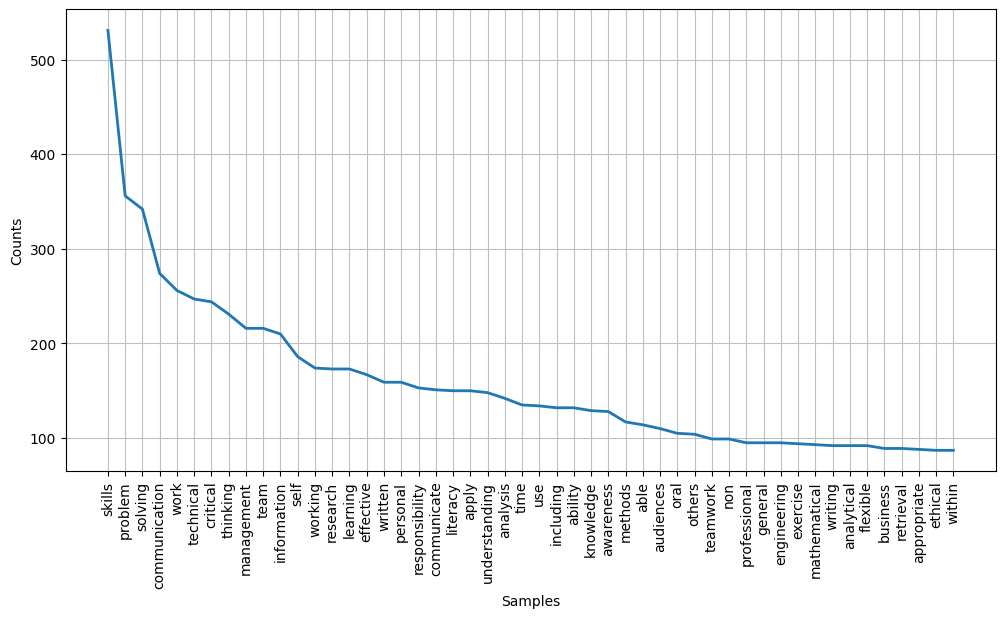

In [ ]:
plt.figure(figsize =(12,6))
fdist.plot(50, cumulative = False)
plt.show